## Project Goal
> The goal of this project is to **Clean the dataset** to predict housing price fluctuations in New York City.

- **First, let's import relevant libraries.**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

- **Read the Data**

In [2]:
# Read the dataset
df = pd.read_csv('housing.csv')

# Check the first 5 entries
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- **How many Rows and Columns?**

In [6]:
# Shape
print("There are \n", df.shape[0], "\nentries/rows and\n", 
      df.shape[1], "\nfeatures/columns in this daataset.")


There are 
 20640 
entries/rows and
 10 
features/columns in this daataset.


- **What are the datatypes pf each feature in this dataset?**

In [7]:
# Data Types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

- **Which features/columns are numerical?**

In [9]:
# Numerical Columns
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.columns.values
#num_cols

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

### Data Cleaning
#### Missing Data
> **Technique #1**: **Missing Data Heatmap** 
- Works best when there are fewer features

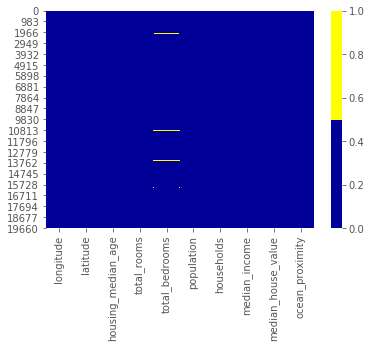

In [10]:
cols = df.columns[:] # All Columns
colors = ['#000099', '#ffff00'] # yellow indicates missing; blue indicates not missing
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

- - <h4>Yellow indicates Missing; Blue indicates not missing</h4>

> **Technique #2**: **Missing Data Percentage List** 
- Works best when there are many features in the dataset.

In [11]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

longitude - 0.0%
latitude - 0.0%
housing_median_age - 0.0%
total_rooms - 0.0%
total_bedrooms - 1.0%
population - 0.0%
households - 0.0%
median_income - 0.0%
median_house_value - 0.0%
ocean_proximity - 0.0%


> **Technique #3**: **Missing Data Histogram** 
- Also works best when there are many features in the dataset.

created missing indicator for: total_bedrooms


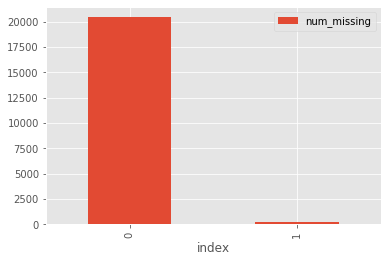

In [13]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
# based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')